<a href="https://colab.research.google.com/github/KYOH95/Database_Studies/blob/main/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. 구글 드라이브로부터 데이터 불러오기

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import pandas as pd
import os

#데이터 세트(캐글): https://www.kaggle.com/datasets/extralime/20000-boardgames-dataset
dir = './drive/MyDrive/Project4'
filename = os.listdir(dir)

csv_path = os.path.join(dir, filename[0])
df = pd.read_csv(csv_path)
df.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (29,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,type,id,thumbnail,image,primary,alternate,description,yearpublished,minplayers,...,War Game Rank,Customizable Rank,Children's Game Rank,RPG Item Rank,Accessory Rank,Video Game Rank,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank
0,0,boardgame,30549,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,Pandemic,"['EPIZOotic', 'Pandemia', 'Pandemia 10 Anivers...","In Pandemic, several virulent diseases have br...",2008,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,boardgame,822,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,Carcassonne,"['Carcassonne Jubilee Edition', 'Carcassonne: ...",Carcassonne is a tile-placement game in which ...,2000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,boardgame,13,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...,Catan,"['CATAN', 'Catan (Колонизаторы)', 'Catan telep...","In CATAN (formerly The Settlers of Catan), pla...",1995,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df.shape

(21631, 56)

##1. 데이터 전처리

####1-1. 불필요한 컬럼(특성) 제거

In [132]:
#make meaningful dataframe with valualble columns from the whole dataset
df = df[["id","thumbnail","image","primary","description","yearpublished","minplayers","maxplayers","playingtime","minplaytime",
    "maxplaytime","minage","boardgamecategory","usersrated","average","Board Game Rank","averageweight"]]
df.shape

(21631, 17)

####1-3. 결측치 제거

In [133]:
df.isnull().sum()

id                     0
thumbnail             15
image                 15
primary                0
description            1
yearpublished          0
minplayers             0
maxplayers             0
playingtime            0
minplaytime            0
maxplaytime            0
minage                 0
boardgamecategory    283
usersrated             0
average                0
Board Game Rank        0
averageweight          0
dtype: int64

In [134]:
#Remove null values
df = df.dropna(axis = 0)
df.shape

(21333, 17)

####1-3. 이상치 제거

In [135]:
# remove games which published year are below 1900 or above 2022
condition = (df["yearpublished"]<1900)|(df["yearpublished"]>2022)
df.drop(df.loc[condition].index, inplace=True)
df.shape

(21040, 17)

In [136]:
# remove games which minimun players are below 1 or maximum players are lower than minplayers
condition = (df["minplayers"]<=0)|(df["maxplayers"]<df["minplayers"])
df.drop(df.loc[condition].index, inplace=True)
df.shape

(20882, 17)

In [137]:
# remove games which both minimun play time and maximum play time are 0
condition = (df["minplaytime"]==0)&(df["maxplaytime"]==0)
df.drop(df.loc[condition].index, inplace=True)
df.shape

(20358, 17)

In [138]:
# remove games if min_play_time and max_play_time were put in opposite way
condition = (df["maxplaytime"]<df["minplaytime"])
df.drop(df.loc[condition].index, inplace=True)
df.shape

(20216, 17)

In [139]:
# Check games if average below 1
condition = (df["averageweight"]<1)
df.drop(df.loc[condition].index, inplace=True)
df.shape

(19804, 17)

In [140]:
# Check games if minage below 0 or above 200
condition = (df["minage"]<0)|(df["minage"]>200)
df[condition]

# Check games if usersrated below 0
condition = (df["usersrated"]<=0)
df[condition]

# Check games if average below 0
condition = (df["average"]<=0)
df[condition]
df.shape

(19804, 17)

1-4. 중복 데이터 제거

In [141]:
#check any duplicated data set
df.duplicated().sum()

0

##2. 학습 할 "description" 데이터 프레임 전처리

In [142]:
#데이터 평가 많은 순으로 sort
df.sort_values(by=["usersrated","average"],ascending=[False,False])
df.head(3)

,id,thumbnail,image,primary,description,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,boardgamecategory,usersrated,average,Board Game Rank,averageweight
0,30549,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,Pandemic,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,45,8,['Medical'],109006,7.58896,106,2.4063
1,822,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,Carcassonne,Carcassonne is a tile-placement game in which ...,2000,2,5,45,30,45,7,"['City Building', 'Medieval', 'Territory Build...",108776,7.41837,191,1.9057
2,13,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...,Catan,"In CATAN (formerly The Settlers of Catan), pla...",1995,3,4,120,60,120,10,"['Economic', 'Negotiation']",108064,7.13598,429,2.3130


In [143]:
#new data set for DLM
df_description = df[["id","primary","description"]]
df_description.head(3)

,id,primary,description
0,30549,Pandemic,"In Pandemic, several virulent diseases have br..."
1,822,Carcassonne,Carcassonne is a tile-placement game in which ...
2,13,Catan,"In CATAN (formerly The Settlers of Catan), pla..."


In [144]:
df_description = df_description[0:1000]
df_description.shape

(1000, 3)

####2-1. 텍스트 기반으로 토큰에 넣기

In [145]:
#spacy 이용하여 tokenzing
import spacy
from spacy.tokenizer import Tokenizer
import re

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

subst = ""
regex = r"[^a-zA-Z0-9 \n]"

def tokenize(text):
    # Regex
    tokens = re.sub(";", " ", text)
    tokens = re.sub(regex, subst, tokens)
    # Lower
    tokens = tokens.lower().split()
    
    return tokens

####2-2. 토큰 정제(Regex, Lower)

In [146]:
df_token = df_description.copy()
df_token['tokens'] = df_token['description'].apply(tokenize)

df_token.head(5)

,id,primary,description,tokens
0,30549,Pandemic,"In Pandemic, several virulent diseases have br...","[in, pandemic, several, virulent, diseases, ha..."
1,822,Carcassonne,Carcassonne is a tile-placement game in which ...,"[carcassonne, is, a, tileplacement, game, in, ..."
2,13,Catan,"In CATAN (formerly The Settlers of Catan), pla...","[in, catan, formerly, the, settlers, of, catan..."
3,68448,7 Wonders,You are the leader of one of the 7 great citie...,"[you, are, the, leader, of, one, of, the, 7, g..."
4,36218,Dominion,"&quot;You are a monarch, like your parents bef...","[quot, you, are, a, monarch, like, your, paren..."


####2-3. 토큰 시각화(중간 점검)

In [147]:
from collections import Counter

def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

wc = word_count(df_token['tokens'])
wc.head()

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
106,the,1000,17967,1.0,0.071086,0.071086,1.000
17,of,985,7773,2.0,0.030754,0.101840,0.985
53,to,980,7133,3.0,0.028222,0.130061,0.980
76,and,986,6908,4.0,0.027331,0.157393,0.986
5,a,968,6204,5.0,0.024546,0.181939,0.968


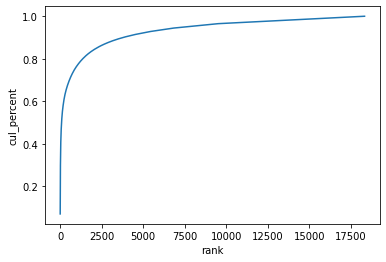

In [148]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data=wc);

In [149]:
wc[wc['rank'] <= 3000]['cul_percent'].max()

0.8801899109792217

####2-4. 불용어(Stop words)

In [150]:
STOP_WORDS = nlp.Defaults.stop_words.union(['9','10','game','boardgame','quot','\n','\n\n'])


tokens = []
# 토큰에서 불용어 제거, 소문자화 하여 업데이트
for doc in df_token['tokens']:
    doc_tokens = []

    for token in doc: 
        if token not in STOP_WORDS:
            doc_tokens.append(token)

    tokens.append(doc_tokens)

df_token['tokens'] = tokens
word_count(df_token['tokens']).head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
73,players,825,2419,1.0,0.019556,0.019556,0.825
33,cards,505,1828,2.0,0.014778,0.034334,0.505
44,player,632,1669,3.0,0.013493,0.047827,0.632
286,card,355,1015,4.0,0.008206,0.056033,0.355
58,new,422,794,5.0,0.006419,0.062451,0.422
141,points,365,717,6.0,0.005796,0.068248,0.365
330,play,396,673,7.0,0.005441,0.073689,0.396
69,board,343,586,8.0,0.004737,0.078426,0.343
54,turn,376,580,9.0,0.004689,0.083115,0.376
570,different,294,437,10.0,0.003533,0.086648,0.294


####2-5. 표제어 추출(Stemming)

In [151]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

tokens = []
for doc in df_token['tokens']:
    doc_tokens = []
    for token in doc:
        doc_tokens.append(ps.stem(token))
    tokens.append(doc_tokens)

df_token['tokens'] = tokens

In [152]:
df_token

,id,primary,description,tokens
0,30549,Pandemic,"In Pandemic, several virulent diseases have br...","[pandem, virul, diseas, broken, simultan, worl..."
1,822,Carcassonne,Carcassonne is a tile-placement game in which ...,"[carcassonn, tileplac, player, draw, place, ti..."
2,13,Catan,"In CATAN (formerly The Settlers of Catan), pla...","[catan, settler, catan, player, tri, domin, fo..."
3,68448,7 Wonders,You are the leader of one of the 7 great citie...,"[leader, 7, great, citi, ancient, world, gathe..."
4,36218,Dominion,"&quot;You are a monarch, like your parents bef...","[monarch, like, parent, ruler, small, pleasant..."
...,...,...,...,...
1014,165950,Beasty Bar,The animals are dressed up and ready to enter ...,"[anim, dress, readi, enter, beasti, barquot, n..."
1015,249,Lifeboats,Also known as 'Rette Sich Wer Kann' ('Each Man...,"[known, rett, sich, wer, kann, man, time, refe..."
1016,340,Frank's Zoo,This game is played in several hands. In each ...,"[play, hand, hand, player, tri, rid, card, sco..."
1017,144797,Argent: The Consortium,The time has come for the selection of a new C...,"[time, come, select, new, chancellor, argent, ..."


####2-6. 토큰 시각화(SpaCy)

In [153]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


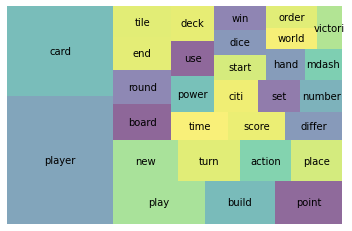

In [154]:
import spacy
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
# nlp = spacy.load("en_core_web_sm")

wc = word_count(df_token['tokens'])
wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6 )
plt.axis('off')
plt.show()

####2-7. 통계적 트리밍(Trimming)

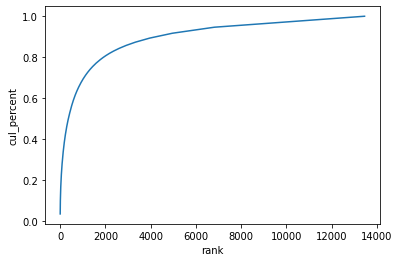

In [155]:
sns.lineplot(x='rank', y='cul_percent', data=wc);

In [156]:
wc.tail(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
13434,sharks10,1,1,13441.0,0.000008,0.999927,0.001
13438,partners10,1,1,13442.0,0.000008,0.999935,0.001
13439,hedgehog10,1,1,13443.0,0.000008,0.999943,0.001
13445,indines10,1,1,13444.0,0.000008,0.999951,0.001
13443,workerplacementenginebuild,1,1,13445.0,0.000008,0.999960,0.001
13442,europeanstyl,1,1,13446.0,0.000008,0.999968,0.001
13441,erratatypofaq,1,1,13447.0,0.000008,0.999976,0.001
13448,harbormast,1,1,13448.0,0.000008,0.999984,0.001
13447,predefin,1,1,13449.0,0.000008,0.999992,0.001
13449,laboralik,1,1,13450.0,0.000008,1.000000,0.001


In [157]:
wc['word_in_docs_percent'].describe()

count    13450.000000
mean         0.006266
std          0.022075
min          0.001000
25%          0.001000
50%          0.001000
75%          0.003000
max          0.901000
Name: word_in_docs_percent, dtype: float64

In [158]:
wc['word_in_docs_percent']

39       0.901
71       0.557
130      0.531
32       0.344
123      0.397
         ...  
13442    0.001
13441    0.001
13448    0.001
13447    0.001
13449    0.001
Name: word_in_docs_percent, Length: 13450, dtype: float64

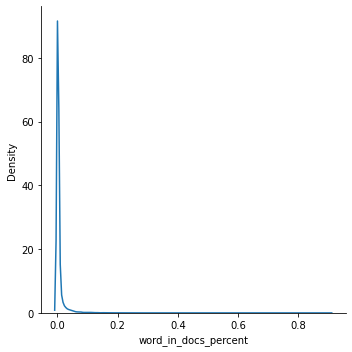

In [159]:
# 문서에 나타나는 빈도
sns.displot(wc['word_in_docs_percent'],kind='kde')

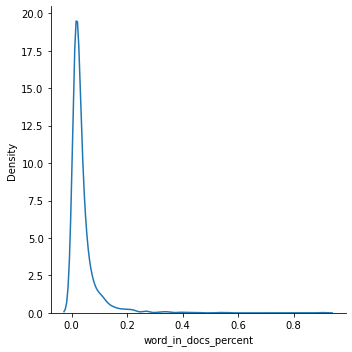

In [160]:
# 최소한 1% 이상 문서에 나타나는 단어들만 선택합니다.

wc = wc[wc['word_in_docs_percent'] >= 0.01]

sns.displot(wc['word_in_docs_percent'], kind='kde');

In [161]:
wc

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
39,player,901,4088,1.0,0.033049,0.033049,0.901
71,card,557,2843,2.0,0.022984,0.056033,0.557
130,play,531,1163,3.0,0.009402,0.065435,0.531
32,build,344,897,4.0,0.007252,0.072686,0.344
123,point,397,852,5.0,0.006888,0.079574,0.397
...,...,...,...,...,...,...,...
4453,northern,10,10,1903.0,0.000081,0.798660,0.010
4416,signific,10,10,1904.0,0.000081,0.798740,0.010
4820,lucr,10,10,1907.0,0.000081,0.798983,0.010
5030,undead,10,10,1909.0,0.000081,0.799145,0.010


##3. Embedding

####3-1. One-hot Encoding

In [168]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.datasets import imdb

In [162]:
df_token.head(3)

,id,primary,description,tokens
0,30549,Pandemic,"In Pandemic, several virulent diseases have br...","[pandem, virul, diseas, broken, simultan, worl..."
1,822,Carcassonne,Carcassonne is a tile-placement game in which ...,"[carcassonn, tileplac, player, draw, place, ti..."
2,13,Catan,"In CATAN (formerly The Settlers of Catan), pla...","[catan, settler, catan, player, tri, domin, fo..."


In [163]:
X = df_token["tokens"]
y = df_token["id"]

In [169]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X)
X_encoded = tokenizer.texts_to_sequences(X)

In [170]:
#get vocab_size
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

#get max_len
np.mean([len(sent) for sent in X_encoded], dtype=int)

13451


123

In [171]:
#transform using pad_sequences
maxlen = 250 # bigger than mean of len of X
X_pad = pad_sequences(X_encoded, maxlen=maxlen)

####3-2. Word2Vec

In [172]:
!pip install gensim --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [173]:
import gensim

gensim.__version__

'4.2.0'

In [174]:
# import gensim.downloader as api

# wv = api.load('word2vec-google-news-300')

In [175]:
#get embedding_matrix using by Word2Vec
import numpy as np
embedding_matrix = np.zeros((vocab_size, 300))
def get_vector(word):
    if word in wv:
        return wv[word]
    else:
        return None

for word, i in tokenizer.word_index.items():
    temp = get_vector(word)
    if temp is not None:
        embedding_matrix[i] = temp

In [176]:
oov = []
for word, _ in tokenizer.word_index.items():
    if word not in wv:
        oov.append(word)
print(len(oov))
print(len(tokenizer.word_index.items()))
print(oov[0])

7822
13450
'victori'


####3-3. fastText

In [177]:
from pprint import pprint as print
from gensim.models.fasttext import FastText
from gensim.test.utils import datapath

# Set file names for train and test data
corpus_file = datapath('lee_background.cor')

model = FastText(vector_size=300)

# build the vocabulary
model.build_vocab(corpus_file=corpus_file)

# train the model
model.train(
    corpus_file=corpus_file, epochs=model.epochs,
    total_examples=model.corpus_count, total_words=model.corpus_total_words,
)

ft = model.wv

In [178]:
#get embedding_matrix using by Word2Vec
import numpy as np
embedding_matrix = np.zeros((vocab_size, 300))
def get_vector(word):
    if word in ft:
        return ft[word]
    else:
        return None

for word, i in tokenizer.word_index.items():
    temp = get_vector(word)
    if temp is not None:
        embedding_matrix[i] = temp


In [181]:
oov = []
for word, _ in tokenizer.word_index.items():
    if word not in ft:
        oov.append(word)
print(len(oov))
print(len(tokenizer.word_index.items()))

0
13450
